## U4 :: Análisis de estructuras en red
# **Práctica 2 - Comunicaciones en una PYME**


---

<br>

En esta práctica, realizaremos el análisis de una red corporativa basándonos en las comunicaciones (i.e. correos electrónicos) intercambiados entre los empleados de una PYME. 
Cada nodo representará a un empleado y cada enlace (dirigido) entre dos nodos a un correo electrónico individual. Asimismo, el nodo izquierdo representará al remitente y el nodo derecho al destinatario. 

In [56]:
# from google.colab import drive
# drive.mount('/content/drive')
# 
# import networkx as nx
# import matplotlib.pyplot as plt
# 
# path ='/content/drive/MyDrive/Colab Notebooks/U4 :: Análisis de estructuras en red/P2/'

In [57]:
from datetime import datetime

import matplotlib.pyplot as plt
import networkx as nx

### **Pregunta 1**

Usando networkx, carga el multigrafo dirigido (puedes usar `nx.read_edgelist`) desde `datos_comunicaciones_email.txt`. Asegúrate de que los nombres de nodo son cadenas. Además, en la importación de los datos desde el fichero ten en cuenta que cada enlace cuenta con un atributo con la hora (en formato 'timestamp') del envío de cada email.

*Esta función debe devolver un grafo multigrafo dirigido. 
Además, imprime el valor del atributo "hora" para el primer mensaje intercambiado entre los nodos 1 y 2.* 



In [58]:
def respuesta_1() -> nx.Graph:
    G = nx.read_edgelist('datos_comunicaciones_email.txt', create_using=nx.MultiDiGraph(), nodetype=str,
                         data=(('hora', str),))
    return G


G_1 = respuesta_1()

first_message_hour = G_1['1']['2'][0]['hora']
message_datetime = datetime.fromtimestamp(int(first_message_hour))

print(f'Primer mensaje entre los nodos 1 y 2: {message_datetime}')

Primer mensaje entre los nodos 1 y 2: 2010-01-02 18:40:10


### **Pregunta 2**

¿Cuántos empleados y emails están representados en el grafo del ejercicio 1?

*Esta función debería devolver el número de empleados junto al totla de mensaje intercambiados por todos los empleados.*

In [59]:
def respuesta_2():
    G = respuesta_1()

    employee_count = len(G.nodes)
    email_count = len(G.edges)

    return employee_count, email_count


count_of_employees, count_of_emails = respuesta_2()
print(f"Employees: {count_of_employees} | Emails: {count_of_emails}")

Employees: 167 | Emails: 82927


### **Pregunta 3**

* **Parte 1**. Imaginamos que la información en esta empresa solo se puede intercambiar mediante correos electrónicos.

     Cuando un empleado envía un correo electrónico a otro empleado, se ha creado un canal de comunicación que permite que el remitente proporcione información al receptor, pero no al revés.

     Según los correos electrónicos enviados, ¿es posible que la información pase de un empleado a otro empleado?


* **Parte 2**. Ahora imaginemos que un canal de comunicación establecido por un correo electrónico permite que la información se intercambie en ambos sentidos.

     Según los correos electrónicos enviados, ¿es posible que la información pase de un empleado a otro empleado?


*Esta función debe volver una tupla con valores booleanos (parte1, parte2).*

In [60]:
def respuesta_3():
    G = respuesta_1()
    return nx.is_strongly_connected(G), nx.is_weakly_connected(G)


respuesta_3()

(False, True)

### **Pregunta 4**

¿Cuántos nodos hay en el componente débilmente conectado más grande (en términos de nodos)?

*Esta función debe devolver un `int`.*

In [89]:
def respuesta_4():
    G = respuesta_1()

    components = nx.weakly_connected_components(G)

    return len(max(components, key=len))


print(f"Componente debilmente conectado con mas nodos: {respuesta_4()}")

Componente debilmente conectado con mas nodos: 167


### **Pregunta 5**

¿Cuántos nodos hay en el componente componente fuertemente conectado más grande? 

*Esta función debe devolver un `int`*

In [90]:
def respuesta_5():
    G = respuesta_1()

    components = nx.strongly_connected_components(G)

    return len(max(components, key=len))


print(f"Componente fuertemente conectado con mas nodos: {respuesta_5()}")

Componente fuertemente conectado con mas nodos: 126


### **Pregunta 6**

Encuentra el subgrafo en el componente fuertemente conectado más grande y crea un subgrafo a partir del mismo con la función `subgraph`. 

*Esta función debe devolver un subgrafo.*

In [91]:
def respuesta_6():
    G = respuesta_1()
    components = nx.strongly_connected_components(G)
    biggest_component = max(components, key=len)
    subgraph = G.subgraph(biggest_component)
    return subgraph

Puedes usar el siguiente código para visualizar el subgrafo creado (**nota**: puede llevar varios minutos).

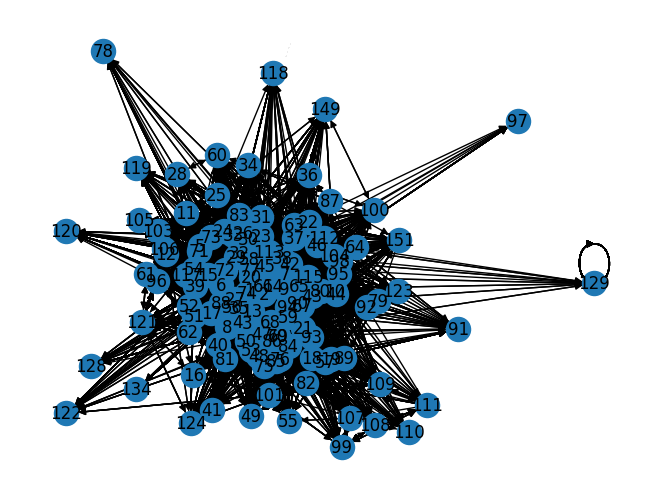

In [92]:
# Dibujar subgrafo

pos = nx.spring_layout(respuesta_6())
nx.draw(respuesta_6(), pos, with_labels=True)
plt.show()

### **Pregunta 7**

¿Cuál es la distancia media entre los nodos de ese subgrafo?

*Esta función debe devolver un `float`.*

In [94]:
def respuesta_7():
    G_subgraph = respuesta_6()
    return nx.average_shortest_path_length(G_subgraph)


respuesta_7()

1.6461587301587302

### **Pregunta 8**

¿Cuál es la distancia más larga entre 2 empleados en el subgrafo previamente creado? 

*Esta función debe devolver un `int`.*

In [95]:
def respuesta_8():
    G_subgraph = respuesta_6()
    return nx.diameter(G_subgraph)


respuesta_8()

3

### **Pregunta 9**

¿Cuál es el conjunto de nodos del subgrafo anterior con excentricidad igual al diámetro?

*Esta función debe devolver un conjunto de nodo/s.*

In [98]:
def respuesta_9():
    G_subgraph = respuesta_6()
    return nx.periphery(G_subgraph)


respuesta_9()

['97', '129', '134']

### **Pregunta 10**

¿Cuál es el conjunto de nodos en el subgrafo previo con excentricidad igual al radio?

*Esta función debe devolver un conjunto de nodo/s.*

In [99]:
def respuesta_10():
    G_subgraph = respuesta_6()
    return nx.center(G_subgraph)


respuesta_10()

['38']

### **Pregunta 11**

¿Qué nodo en el subgrafo previo está conectado a la mayoría de los otros nodos por un camino más corto cuya longitud es igual al diámetro de subgrafo?, ¿Cuántos nodos están conectados a este nodo?


*Esta función debe devolver una tupla (nombre del nodo, número of nodos conectados).*

In [103]:
def respuesta_11():
    G_subgraph = respuesta_6()
    peripheral_nodes = nx.periphery(G_subgraph)

    graph_diameter = nx.diameter(G_subgraph)

    max_count = 0
    max_node = None
    for node in peripheral_nodes:
        current_count = 0
        distances = nx.shortest_path_length(G_subgraph, node)

        for dis in distances:
            if distances[dis] == graph_diameter:
                current_count += 1

        if current_count > max_count:
            max_count = current_count
            max_node = node

    return max_node, max_count


respuesta_11()

('97', 63)

### **Pregunta 12**

Construye un grafo no dirigido llamado `G_un` a partir del subgrafo generador en momentos previos (se pueden ignorar los atributos).

*Esta función debe devolver un grafo*

In [101]:
def respuesta_12():
    G_subgraph = respuesta_6()
    G_new = nx.to_undirected(G_subgraph)
    return G_new


G_un = respuesta_12()